<a href="https://colab.research.google.com/github/andactasdemir24/veri/blob/main/veriMadencili%C4%9Fi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import re
#from sentiment_utils import *
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation
import keras
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from nltk.corpus import stopwords
np.random.seed(1)
from sklearn.model_selection import train_test_split

#from emo_utils import *
import matplotlib.pyplot as plt

%matplotlib inline
from keras.layers import Dense , Flatten ,Embedding,Input
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

from sklearn.feature_extraction.text import TfidfVectorizer
import re 
import string
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
stop_words.append("and")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(input_text):
    '''
    Function to remove English stopwords from a Pandas Series.
    
    Parameters:
        input_text : text to clean
    Output:
        cleaned Pandas Series 
    '''
    stopwords_list = stopwords.words('english')
    # Some words which might indicate a certain sentiment are kept via a whitelist
    whitelist = ["n't", "not", "no"]
    words = input_text.split() 
    clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
    return " ".join(clean_words)

def remove_mentions(input_text):
    '''
    Function to remove mentions, preceded by @, in a Pandas Series
    
    Parameters:
        input_text : text to clean
    Output:
        cleaned Pandas Series 
    '''
    return re.sub(r'@\w+', '', input_text)

In [ ]:
#Read the data
train_df = pd.read_csv("/content/fifa_world_cup_2022_tweets.csv")
train_df.head()

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative


In [ ]:
# data load
data = pd.read_csv(r"/content/fifa_world_cup_2022_tweets.csv")
data = data.iloc[:, 4:]
data

,Tweet,Sentiment
0,What are we drinking today @TucanTribe \n@MadB...,neutral
1,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,Worth reading while watching #WorldCup2022 htt...,positive
3,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,"If the BBC cares so much about human rights, h...",negative
...,...,...
22519,Here We go World cup 2022 #WorldCup2022,positive
22520,Anderlecht confirms former Viborg FF's Jesper ...,neutral
22521,Great thread to read before the start of #Worl...,positive
22522,Raphinha wants Brazil to be united at the #Wor...,positive


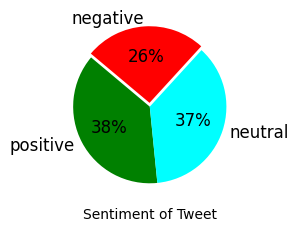

In [ ]:
# show frequency of output in %
plt.figure(figsize = (3,3))
labels = ["positive", "neutral", "negative"]
sizes = [8489, 8251, 5784]
color = ["green", "cyan", "red"]

plt.pie(sizes, 
        labels = labels, 
        textprops={'fontsize': 12}, 
        startangle=140, 
        autopct='%1.0f%%',
        explode=[0, 0, 0.05],
        colors = color)
plt.xlabel("Sentiment of Tweet")

plt.tight_layout()
plt.show()

In [ ]:
# divide data into train and test for further work
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=0, stratify = data["Sentiment"])

display(train)
display(test)

,Tweet,Sentiment
12233,"Human rights violations, awful LGBTQ+ rights, ...",negative
20886,and restricting movement and travel of players...,negative
10951,Here we go!!! #WorldCup2022,positive
3932,I hope they don't intend on bringing the stret...,negative
17865,"In the name of the Goddess of Victory, we wish...",positive
...,...,...
18301,Its today #WorldCup2022 https://t.co/VdEDGngZKh,neutral
7553,"OMG, VAR is present, too....😡🥴😡😳 'money, money...",negative
14243,Climate Propaganda 😫🤣 Fuck off BBC #WorldCup2022,negative
13251,It's that time again... #ItsComingHome #WorldC...,positive


,Tweet,Sentiment
19101,We go again! 🇩🇪🇩🇪🇩🇪\n#DieMannschaft \n#WorldCu...,positive
12437,NIGERIAN PIGIN IS NOW OFFICIAL IN THE WORLD CU...,positive
4565,And Valencia scored again. Great finish by the...,positive
22045,Worldcup pewer at Our Erattupetta❤💙💛\n\n#FIFA...,positive
1977,Need help with;\n√maths\n√finance\n√economics\...,neutral
...,...,...
5817,I can't watch football with English commentary...,positive
18669,This World Cup feels like a farce.\nI miss tha...,negative
11022,and so it begins......\nIf ever better words t...,positive
19605,"@georgeriley0 Hi, your ️#WorldCup2022 is now a...",positive


In [ ]:
data

,Tweet,Sentiment
0,What are we drinking today @TucanTribe \n@MadB...,neutral
1,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,Worth reading while watching #WorldCup2022 htt...,positive
3,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,"If the BBC cares so much about human rights, h...",negative
...,...,...
22519,Here We go World cup 2022 #WorldCup2022,positive
22520,Anderlecht confirms former Viborg FF's Jesper ...,neutral
22521,Great thread to read before the start of #Worl...,positive
22522,Raphinha wants Brazil to be united at the #Wor...,positive


In [ ]:
# clean the data before proceding in Model 
def data_cleaning(i):
    i = re.sub(r"([^A-Za-z]|_)+", " ", i).lower()
    w = []
    for word in i.split(","):
        if len(word) > 3:
            w.append(word)
    return (" ".join(w))

data["Tweet"] = data["Tweet"].apply(data_cleaning)
data["Tweet"]

0        what are we drinking today tucantribe madbears...
1        amazing canadasocceren worldcup launch video s...
2        worth reading while watching worldcup https t ...
3        golden maknae shinning bright https t co ayzbz...
4        if the bbc cares so much about human rights ho...
                               ...                        
22519                       here we go world cup worldcup 
22520    anderlecht confirms former viborg ff s jesper ...
22521    great thread to read before the start of world...
22522    raphinha wants brazil to be united at the worl...
22523    how to buy sot on pinksale have you been confu...
Name: Tweet, Length: 22524, dtype: object

In [ ]:
data["Sentiment"].value_counts()

positive    8489
neutral     8251
negative    5784
Name: Sentiment, dtype: int64

In [ ]:
# divide data into train and test for further work
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=0, stratify = data["Sentiment"])

display(train)
display(test)

,Tweet,Sentiment
12233,human rights violations awful lgbtq rights tho...,negative
20886,and restricting movement and travel of players...,negative
10951,here we go worldcup,positive
3932,i hope they don t intend on bringing the stret...,negative
17865,in the name of the goddess of victory we wish ...,positive
...,...,...
18301,its today worldcup https t co vdedgngzkh,neutral
7553,omg var is present too money money money qatec...,negative
14243,climate propaganda fuck off bbc worldcup,negative
13251,it s that time again itscominghome worldcup ht...,positive


,Tweet,Sentiment
19101,we go again diemannschaft worldcup https t co ...,positive
12437,nigerian pigin is now official in the world cu...,positive
4565,and valencia scored again great finish by the ...,positive
22045,worldcup pewer at our erattupetta fifaworldcup...,positive
1977,need help with maths finance economics calculu...,neutral
...,...,...
5817,i can t watch football with english commentary...,positive
18669,this world cup feels like a farce i miss that ...,negative
11022,and so it begins if ever better words to start...,positive
19605,georgeriley hi your worldcup is now available...,positive


In [ ]:
data = pd.read_csv("/content/fifa_world_cup_2022_tweets.csv")

In [ ]:
data.shape

(22524, 6)

In [ ]:
data.head(10)

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative
5,5,2022-11-20 23:57:32+00:00,0,Twitter for Android,"And like, will the mexican fans be able to scr...",negative
6,6,2022-11-20 23:57:06+00:00,0,Twitter for Android,Look like a only me and the Jamaican football ...,neutral
7,7,2022-11-20 23:57:05+00:00,0,Twitter for Android,Really? Football on a Monday morning at 9 and ...,negative
8,8,2022-11-20 23:56:10+00:00,1,Twitter for iPhone,"As the World Cup starts in Qatar, it’s Black A...",positive
9,9,2022-11-20 23:56:08+00:00,0,Twitter for iPhone,#WorldCup2022 @ITVSport &amp; @LFSYSTEMMUSIC g...,positive


In [ ]:
data.drop("Unnamed: 0" , axis = 1,inplace = True )

In [ ]:
data['minutes'] = pd.to_datetime(data['Date Created'],
                                format='%Y-%m-%d %H:%M:%S').dt.minute
data['hours'] = pd.to_datetime(data['Date Created'],
                                format='%Y-%m-%d %H:%M:%S').dt.hour

In [ ]:
data.describe()

,Number of Likes,minutes,hours
count,22524.000000,22524.000000,22524.000000
mean,23.822856,26.029435,14.211419
std,2128.018705,17.880917,4.139668
min,0.000000,0.000000,0.000000
25%,0.000000,10.000000,13.000000
50%,0.000000,23.000000,16.000000
75%,2.000000,41.000000,16.000000
max,316867.000000,59.000000,23.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22524 entries, 0 to 22523
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date Created     22524 non-null  object
 1   Number of Likes  22524 non-null  int64 
 2   Source of Tweet  22524 non-null  object
 3   Tweet            22524 non-null  object
 4   Sentiment        22524 non-null  object
 5   minutes          22524 non-null  int64 
 6   hours            22524 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.2+ MB


In [ ]:
data.nunique()

Date Created       14412
Number of Likes      271
Source of Tweet      109
Tweet              22360
Sentiment              3
minutes               60
hours                 24
dtype: int64

In [ ]:
data.isna().sum()

Date Created       0
Number of Likes    0
Source of Tweet    0
Tweet              0
Sentiment          0
minutes            0
hours              0
dtype: int64

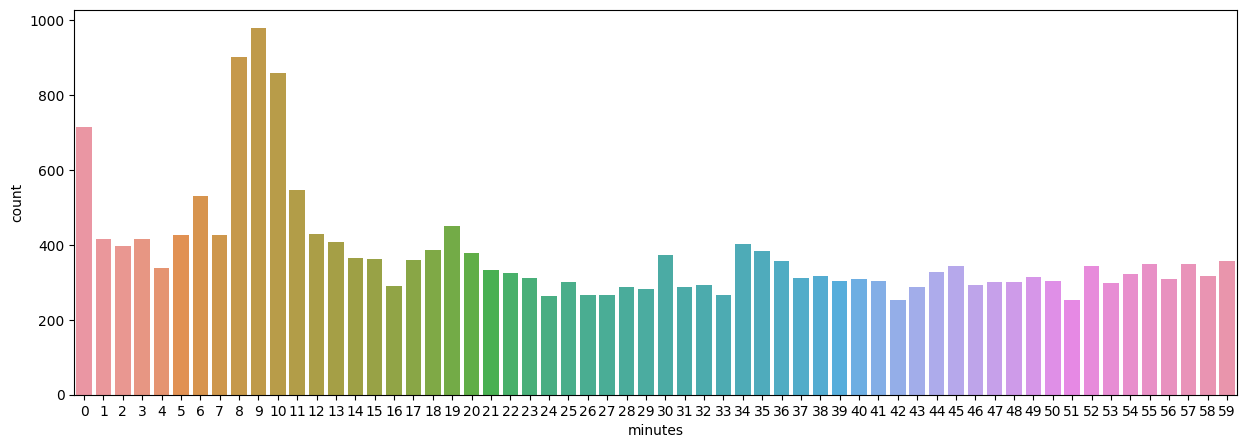

In [ ]:
plt.figure(figsize = (15,5));
sns.countplot(data = data , x = "minutes");

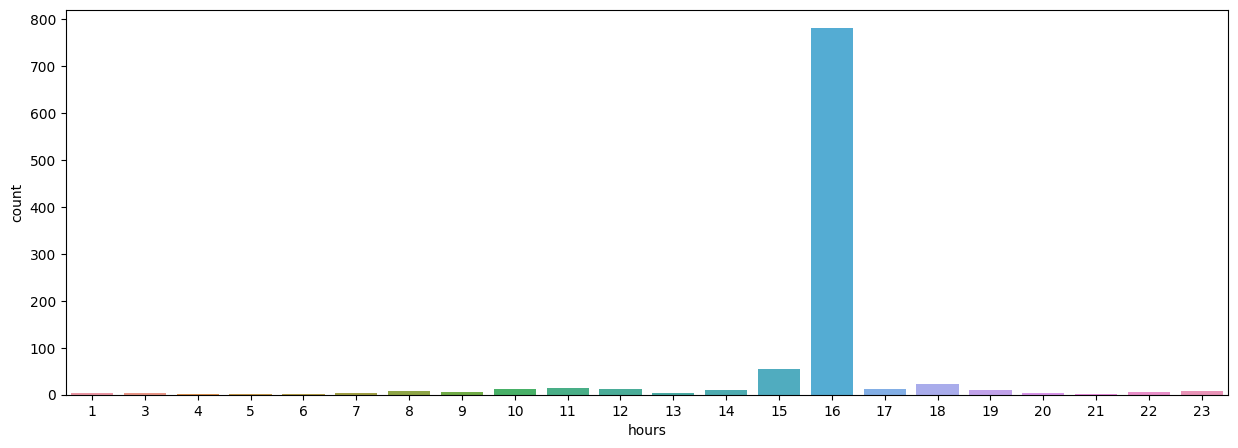

In [ ]:
top_hours = data[data['minutes'] == 9]
plt.figure(figsize = (15,5));
sns.countplot(data = top_hours , x = "hours");

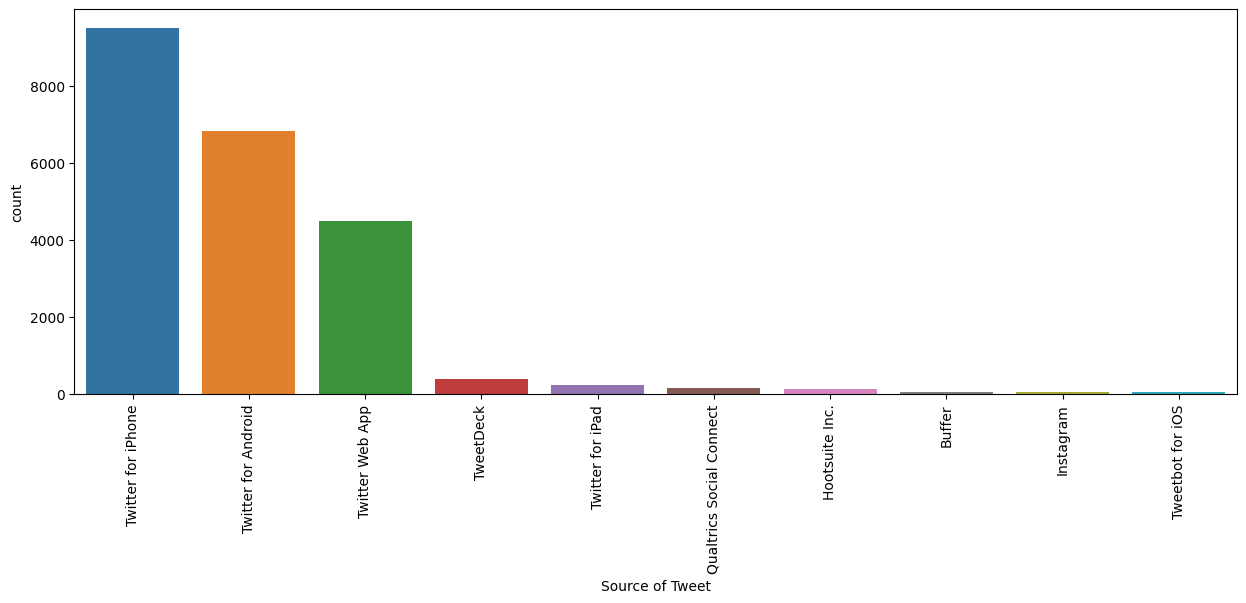

In [ ]:
plt.figure(figsize = (15,5));
sns.countplot(data = data , x = "Source of Tweet" ,
              order = data['Source of Tweet'].value_counts(ascending = False).iloc[:10].index);

plt.xticks(rotation = 90);

<Axes: >

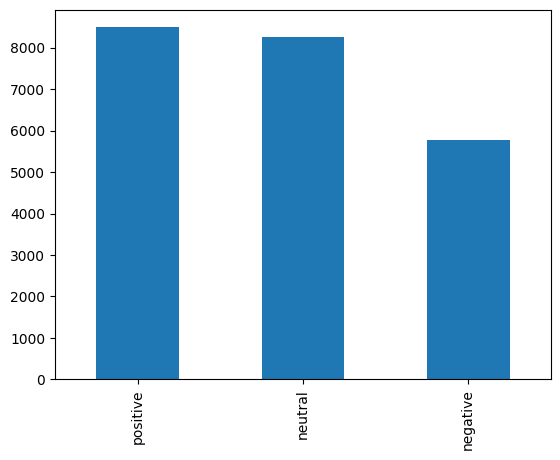

In [ ]:
sent = data['Sentiment'].value_counts()
# plt.plot(kind = "bar")
sent.plot(kind = "bar")

In [ ]:
#clean data 
def clean(tweet):
    tweet = tweet.split(' ')
    tweet = [t for t in tweet if t not in string.punctuation]
    tweet = [t for t in tweet if t.lower() not in stop_words]
    tweet = ' '.join(tweet)
    tweet = re.sub(r'https?://[^\s\n\r]+' , '' , tweet)
    tweet = re.sub('\n' , '' , tweet)
    tweet = re.sub(r'@','',tweet)
    tweet = re.sub(r'#','',tweet)
    tweet = re.sub(r'!','',tweet)
    tweet = tweet.replace(".","")
    tweet = tweet.replace("(","")
    tweet = tweet.replace(")","")
    tweet = tweet.replace('"'," ")
    tweet = tweet.replace('$'," ")
    tweet = tweet.replace('%'," ")
    tweet = tweet.replace('&'," ")
    tweet = " ".join(tweet.split())
    return tweet

In [ ]:
data['Tweet'] = data['Tweet'].apply(clean)

In [ ]:
data['Tweet'].head(5)

0    drinking today TucanTribe MadBears_ lkinc_algo...
1    Amazing CanadaSoccerEN WorldCup2022 launch vid...
2                  Worth reading watching WorldCup2022
3    Golden Maknae shinning brightJeonJungkook Jung...
4    BBC cares much human rights, homosexual rights...
Name: Tweet, dtype: object

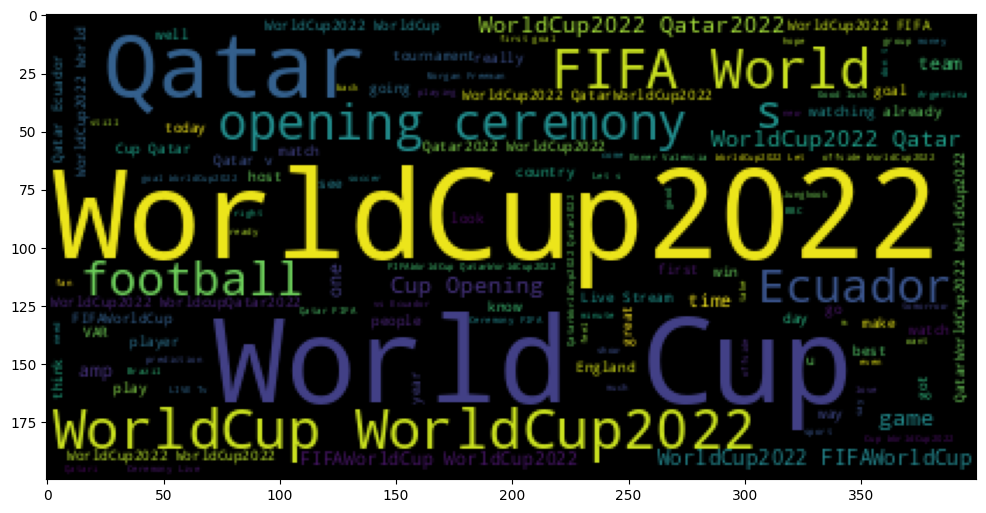

In [ ]:
words = data['Tweet'].tolist()
combined_words = " ".join(words)
plt.figure(figsize = (12,10));
plt.imshow(WordCloud().generate(combined_words))
plt.show()

In [ ]:
word_sent = data[['Tweet','Sentiment']]
word_sent = pd.DataFrame(word_sent.Tweet.str.split(' ').tolist(),index = word_sent.Sentiment).stack()
word_sent = word_sent.reset_index([0,'Sentiment'])
word_sent.columns = ['sentiment','word']
word_sent.head()

,sentiment,word
0,neutral,drinking
1,neutral,today
2,neutral,TucanTribe
3,neutral,MadBears_
4,neutral,lkinc_algo


In [ ]:
word_sent = word_sent.groupby(['sentiment','word'])['sentiment'].count().to_frame()
word_sent.columns = ['count']
word_sent = word_sent.reset_index()
word_sent

,sentiment,word,count
0,negative,''union,1
1,negative,'22,1
2,negative,'72,1
3,negative,'94In,1
4,negative,"'BetBuilders',",1
...,...,...,...
62203,positive,🫶🏻🇶🇦,1
62204,positive,🫶🏼,1
62205,positive,🫶🏼WorldCup2022,1
62206,positive,🫶🏽🫶🏽VamosSelecao,1


In [ ]:
word_sent.sort_values("count" , ascending = False)

,sentiment,word,count
47994,positive,WorldCup2022,6756
25660,neutral,WorldCup2022,6352
4745,negative,WorldCup2022,4922
25652,neutral,World,2323
23179,neutral,Qatar,2222
...,...,...,...
24633,neutral,Tamarindo,1
24634,neutral,TamashiWarNFTs,1
24637,neutral,Tanzanian,1
24639,neutral,Taremi2/1,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['Tweet'], data['Sentiment'], test_size = 0.2)

In [ ]:
tf = TfidfVectorizer()
tf.fit(X_train)
x_train = tf.transform(X_train)
x_test = tf.transform(X_test)

In [ ]:
NB = MultinomialNB()
NB.fit(x_train, y_train)
# y_pred = NB.predict(x_test)

MultinomialNB()

In [ ]:
NB.score(x_test,y_test)

0.6941176470588235

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_predict = lr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_predict)

0.7100998890122087